<a href="https://colab.research.google.com/github/hasanaliozkan-dev/datacampdl/blob/main/DataCampLesson5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Hello nets!***
You're going to build a simple neural network to get a feeling of how quickly it is to accomplish this in Keras.

You will build a network that takes two numbers as an input, passes them through a hidden layer of 10 neurons, and finally outputs a single non-constrained number.

A non-constrained output can be obtained by avoiding setting an activation function in the output layer. This is useful for problems like regression, when we want our output to be able to take any non-constrained value.

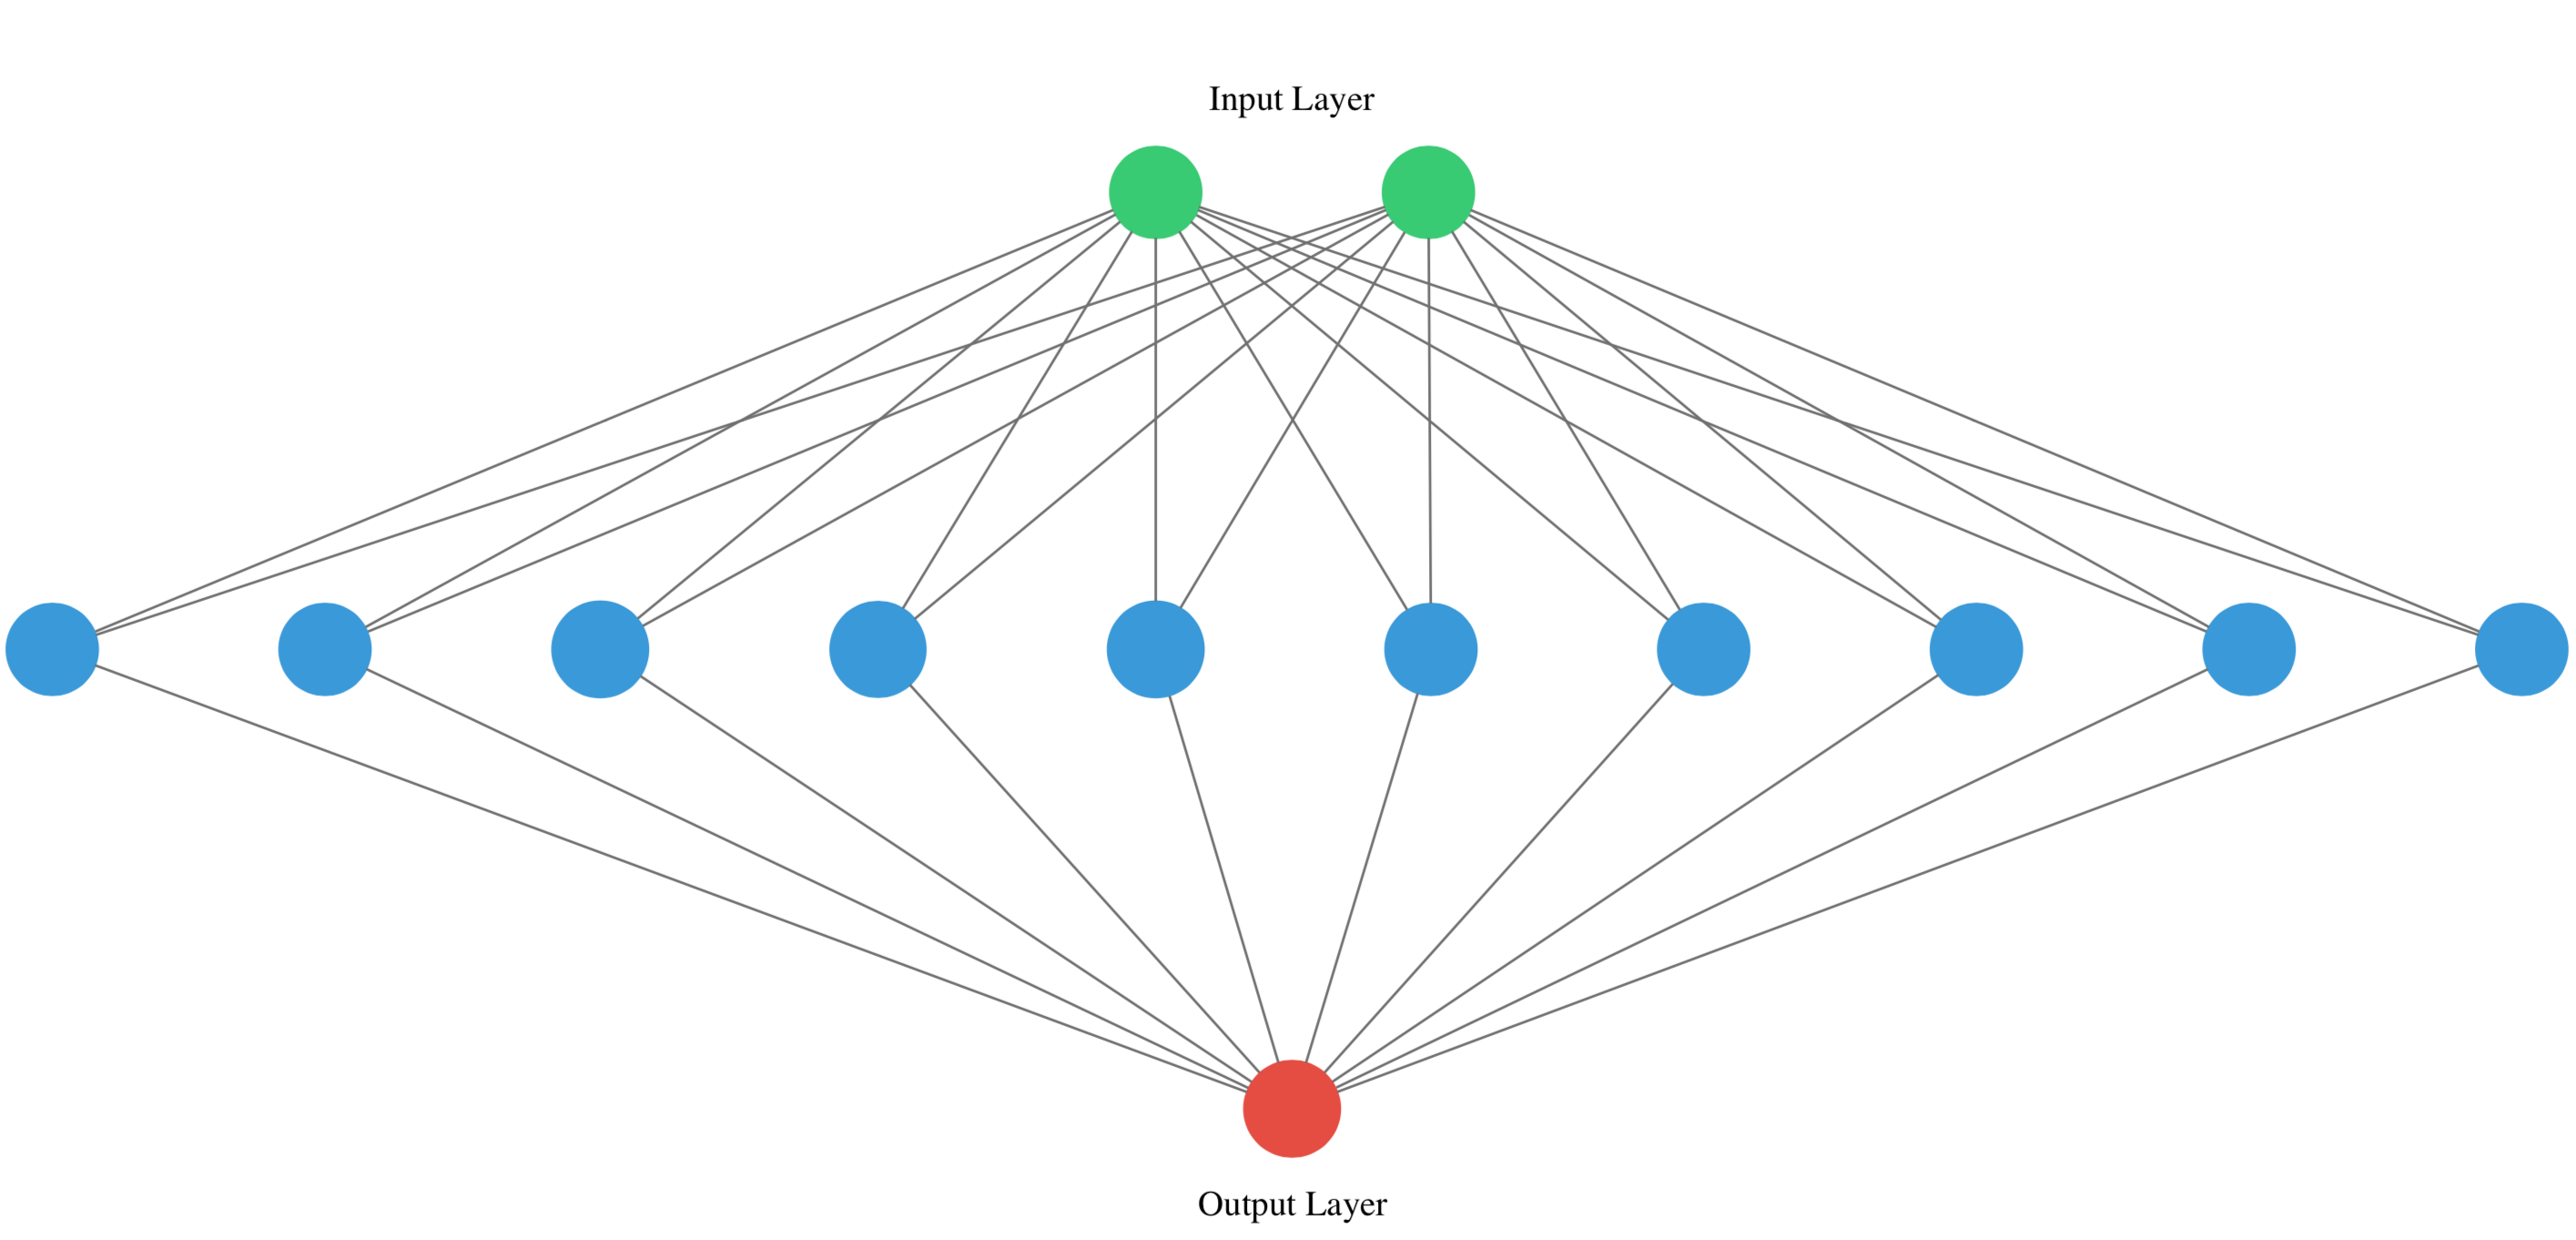

In [ ]:
# Import the Sequential model and Dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(2,), activation="relu"))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarise your model
model.summary()

### ***Counting parameters***
You've just created a neural network. But you're going to create a new one now, taking some time to think about the weights of each layer. The Keras Dense layer and the Sequential model are already loaded for you to use.

This is the network you will be creating:

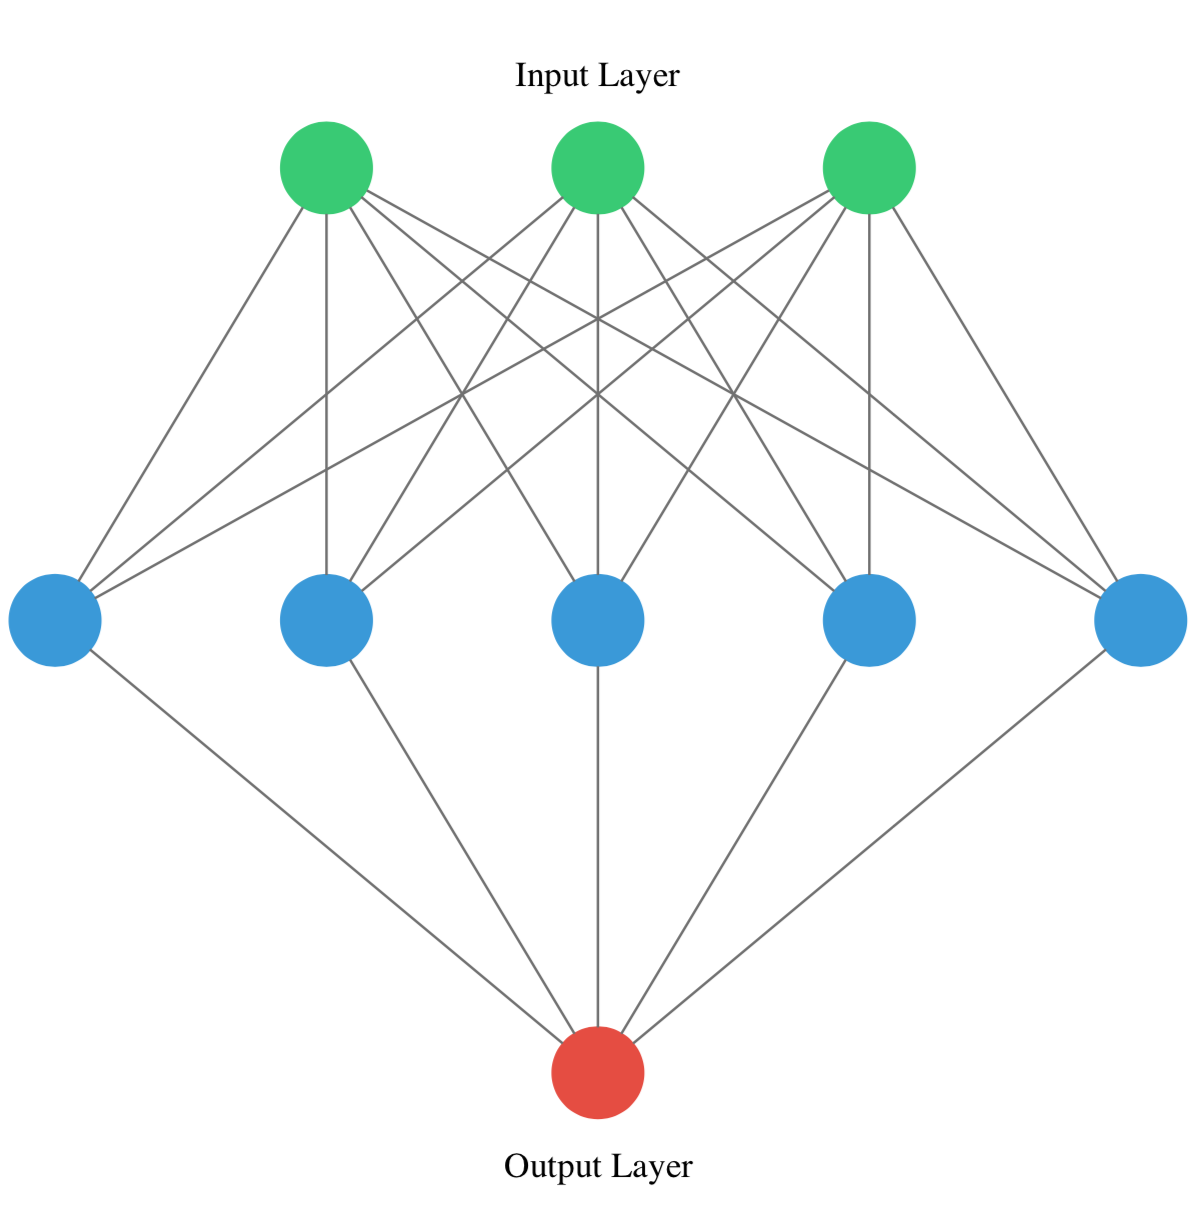


In [ ]:
# Instantiate a new Sequential model
model = Sequential()

# Add a Dense layer with five neurons and three inputs
model.add(Dense(5, input_shape=(3,), activation="relu"))

# Add a final Dense layer with one neuron and no activation
model.add(Dense(1))

# Summarize your model
model.summary()

### ***Build as shown!***
You will take on a final challenge before moving on to the next lesson. Build the network shown in the picture below. Prove your mastered Keras basics in no time!

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Instantiate a Sequential model
model = Sequential()

# Build the input and hidden layer
model.add(Dense(3,input_shape=(2,)))

# Add the ouput layer
model.add(Dense(1))

### ***Specifying a model***
You will build a simple regression model to predict the orbit of the meteor!

Your training data consist of measurements taken at time steps from -10 minutes before the impact region to +10 minutes after. Each time step can be viewed as an X coordinate in our graph, which has an associated position Y for the meteor orbit at that time step.

Note that you can view this problem as approximating a quadratic function via the use of neural networks.

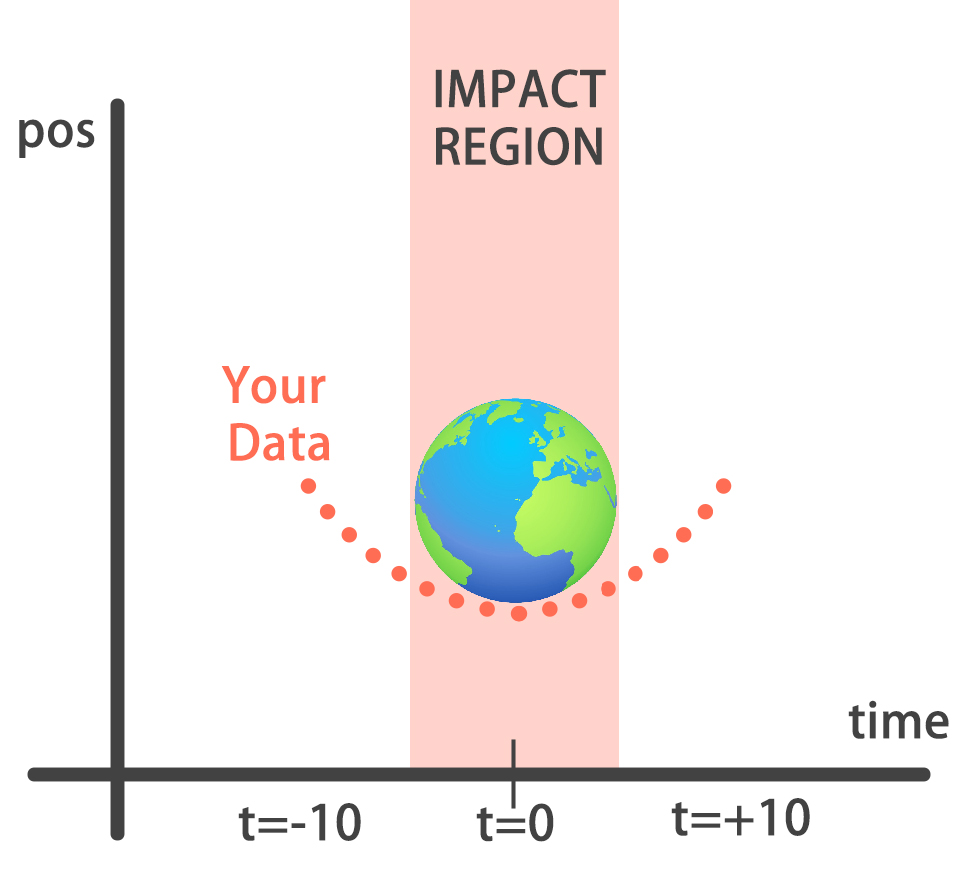


This data is stored in two numpy arrays: one called time_steps , what we call features, and another called y_positions, with the labels. Go on and build your model! It should be able to predict the y positions for the meteor orbit at future time steps.

Keras Sequential model and Dense layers are available for you to use.


In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1,), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))

### ***Training***
You're going to train your first model in this course, and for a good cause!

Remember that before training your Keras models you need to compile them. This can be done with the .compile() method. The .compile() method takes arguments such as the optimizer, used for weight updating, and the loss function, which is what we want to minimize. Training your model is as easy as calling the .fit() method, passing on the features, labels and a number of epochs to train for.

The regression model you built in the previous exercise is loaded for you to use, along with the time_steps and y_positions data. Train it and evaluate it on this very same data, let's see if your model can learn the meteor's trajectory.

In [ ]:
# Compile your model
model.compile(optimizer = 'adam', loss = "mse")

print("Training started..., this can take a while:")

# Fit your model on your data for 30 epochs
model.fit(time_steps,y_positions, epochs = 30)

# Evaluate your model 
print("Final loss value:",model.evaluate(time_steps, y_positions))

### ***Predicting the orbit!***
You've already trained a model that approximates the orbit of the meteor approaching Earth and it's loaded for you to use.

Since you trained your model for values between -10 and 10 minutes, your model hasn't yet seen any other values for different time steps. You will now visualize how your model behaves on unseen data.

If you want to check the source code of plot_orbit, paste show_code(plot_orbit) into the console.

Hurry up, the Earth is running out of time!

Remember np.arange(x,y) produces a range of values from x to y-1. That is the [x, y) interval.

In [ ]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit 
plot_orbit(eighty_min_orbit)

### ***Exploring dollar bills***
You will practice building classification models in Keras with the Banknote Authentication dataset.

Your goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 features: variance,skewness,kurtosis and entropy. These features are calculated by applying mathematical operations over the dollar bill images. The labels are found in the dataframe's class column.

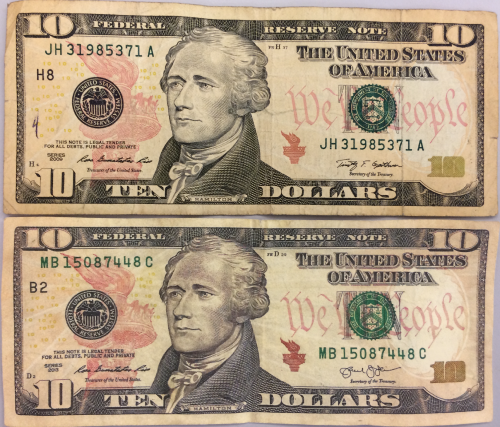

A pandas DataFrame named banknotes is ready to use, let's do some data exploration!



In [ ]:
# Import seaborn
import seaborn as sns

# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue="class") 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

### ***A binary classification model***
Now that you know what the Banknote Authentication dataset looks like, we'll build a simple model to distinguish between real and fake bills.

You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we have 4 features in our dataset. The model's output will be a value constrained between 0 and 1.

We will interpret this output number as the probability of our input variables coming from a fake dollar bill, with 1 meaning we are certain it's a fake bill.

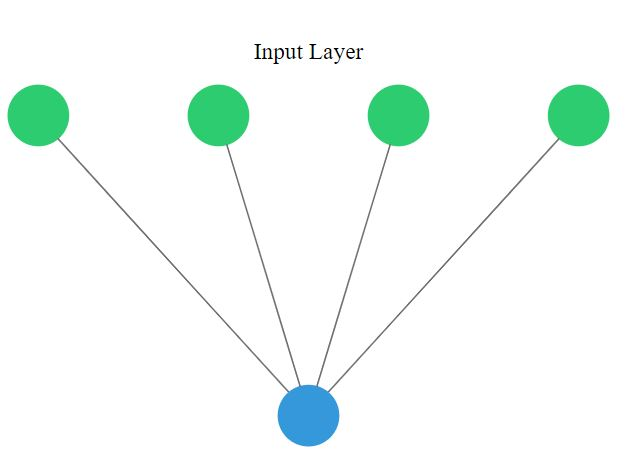

In [ ]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))


# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

### ***Is this dollar bill fake ?***
You are now ready to train your model and check how well it performs when classifying new bills! The dataset has already been partitioned into features: X_train & X_test, and labels: y_train & y_test.

In [ ]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

### ***A multi-class model***
You're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's x and y coordinates on the board.)

This problem is a multi-class classification problem since each dart can only be thrown by one of 4 competitors. So classes/labels are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use the softmax activation function to achieve a total sum of probabilities of 1 over all competitors.

Keras Sequential model and Dense layer are already loaded for you to use.

In [ ]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### ***Prepare your dataset***
In the console you can check that your labels, darts.competitor are not yet in a format to be understood by your network. They contain the names of the competitors as strings. You will first turn these competitors into unique numbers,then use the to_categorical() function from keras.utils to turn these numbers into their one-hot encoded representation.

This is useful for multi-class classification problems, since there are as many output neurons as classes and for every observation in our dataset we just want one of the neurons to be activated.

The dart's dataset is loaded as darts. Pandas is imported as pd. Let's prepare this dataset!

In [ ]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Import to_categorical from keras utils module
from keras.utils import to_categorical

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

### ***Training on dart throwers***
Your model is now ready, just as your dataset. It's time to train!

The coordinates features and competitors labels you just transformed have been partitioned into coord_train,coord_test and competitors_train,competitors_test.

Your model is also loaded. Feel free to visualize your training data or model.summary() in the console.

Let's find out who threw which dart just by looking at the board!

In [ ]:
# Fit your model to the training data for 200 epochs
model.fit(coord_train,competitors_train,epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

### ***Softmax predictions***
Your recently trained model is loaded for you. This model is generalizing well!, that's why you got a high accuracy on the test set.

Since you used the softmax activation function, for every input of 2 coordinates provided to your model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors.

When computing accuracy with the model's .evaluate() method, your model takes the class with the highest probability as the prediction. np.argmax() can help you do this since it returns the index with the highest value in an array.

Use the collection of test throws stored in coords_small_test and np.argmax()to check this out!

In [ ]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

### ***An irrigation machine***
You're going to automate the watering of farm parcels by making an intelligent irrigation machine. Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes/labels are not mutually exclusive, you could water all, none or any combination of farm parcels based on the inputs.

To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a sigmoid activation function. This makes each neuron in the output layer able to output a number between 0 and 1 independently.

Keras Sequential() model and Dense() layers are preloaded. It's time to build an intelligent irrigation machine!

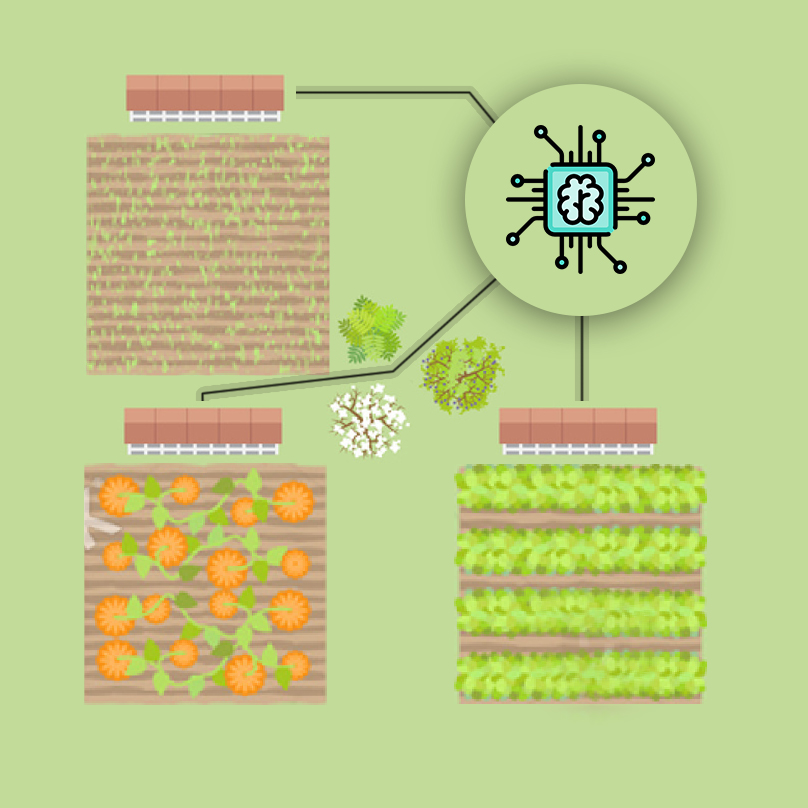





In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64,input_shape=(20,),activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

### ***Training with multiple labels***
An output of your multi-label model could look like this: [0.76 , 0.99 , 0.66 ]. If we round up probabilities higher than 0.5, this observation will be classified as containing all 3 possible labels [1,1,1]. For this particular problem, this would mean watering all 3 parcels in your farm is the right thing to do, according to the network, given the input sensor measurements.

You will now train and predict with the model you just built. sensors_train, parcels_train, sensors_test and parcels_test are already loaded for you to use.

Let's see how well your intelligent machine performs!

In [ ]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

### ***The history callback***
The history callback is returned by default every time you train a model with the .fit() method. To access these metrics you can access the history dictionary parameter inside the returned h_callback object with the corresponding keys.

The irrigation machine model you built in the previous lesson is loaded for you to train, along with its features and labels now loaded as X_train, y_train, X_test, y_test. This time you will store the model's historycallback and use the validation_data parameter as it trains.

You will plot the results stored in history with plot_accuracy() and plot_loss(), two simple matplotlib functions. You can check their code in the console by pasting show_code(plot_loss).

Let's see the behind the scenes of our training!

In [ ]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 50,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['acc'], h_callback.history['val_acc'])

### ***Early stopping your model***
The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the .fit() method.

The model you built to detect fake dollar bills is loaded for you to train, this time with early stopping. X_train, y_train, X_test and y_test are also available for you to use.

In [ ]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', 
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train, y_train, 
           epochs=1000, validation_data=(X_test,y_test),
           callbacks= [monitor_val_acc])

### ***A combination of callbacks***
Deep learning models can take a long time to train, especially when you move to deeper architectures and bigger datasets. Saving your model every time it improves as well as stopping it when it no longer does allows you to worry less about choosing the number of epochs to train for. You can also restore a saved model anytime and resume training where you left it.

The model training and validation data are available in your workspace as X_train, X_test, y_train, and y_test.

Use the EarlyStopping() and the ModelCheckpoint() callbacks so that you can go eat a jar of cookies while you leave your computer to work!

In [ ]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_acc', patience = 3)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000000000000,
                    callbacks = [monitor_val_acc, modelCheckpoint],
                    validation_data = (X_test, y_test))

Learning the digits
You're going to build a model on the digits dataset, a sample dataset that comes pre-loaded with scikit learn. The digits dataset consist of 8x8 pixel handwritten digits from 0 to 9:


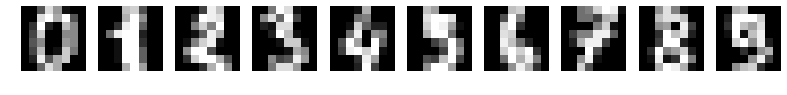
You want to distinguish between each of the 10 possible digits given an image, so we are dealing with multi-class classification.
The dataset has already been partitioned into X_train, y_train, X_test, and y_test, using 30% of the data as testing data. The labels are already one-hot encoded vectors, so you don't need to use Keras to_categorical() function.

Let's build this new model!

In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10,activation='softmax'))

# Compile your model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_train))

### ***Is the model overfitting?***
Let's train the model you just built and plot its learning curve to check out if it's overfitting! You can make use of the loaded function plot_loss() to plot training loss against validation loss, you can get both from the history callback.

If you want to inspect the plot_loss() function code, paste this in the console: show_code(plot_loss)

In [ ]:
# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train, y_train, epochs = 60, validation_data = (X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])


### ***Do we need more data?***
It's time to check whether the digits dataset model you built benefits from more training examples!

In order to keep code to a minimum, various things are already initialized and ready to use:

The model you just built.
X_train,y_train,X_test, and y_test.
The initial_weights of your model, saved after using model.get_weights().
A pre-defined list of training sizes: training_sizes.
A pre-defined early stopping callback monitoring loss: early_stop.
Two empty lists to store the evaluation results: train_accs and test_accs.
Train your model on the different training sizes and evaluate the results on X_test. End by plotting the results with plot_results().

The full code for this exercise can be found on the slides!

In [ ]:
for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train, y_train)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    
# Plot train vs test accuracies
plot_results(train_accs, test_accs)

### ***Comparing activation functions***
Comparing activation functions involves a bit of coding, but nothing you can't do!

You will try out different activation functions on the multi-label model you built for your farm irrigation machine in chapter 2. The function get_model('relu') returns a copy of this model and applies the 'relu' activation function to its hidden layer.

You will loop through several activation functions, generate a new model for each and train it. By storing the history callback in a dictionary you will be able to visualize which activation function performed best in the next exercise!

X_train, y_train, X_test, y_test are ready for you to use when training your models.

In [ ]:
# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model and store the history results
  h_callback = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=20,verbose=0)
  activation_results[act] = h_callback

### ***Comparing activation functions II***
What you coded in the previous exercise has been executed to obtain theactivation_results variable, this time 100 epochs were used instead of 20. This way you will have more epochs to further compare how the training evolves per activation function.

For every h_callback of each activation function in activation_results:

The h_callback.history['val_loss'] has been extracted.
The h_callback.history['val_acc'] has been extracted.
Both are saved into two dictionaries: val_loss_per_function and val_acc_per_function.

Pandas is also loaded as pd for you to use. Let's plot some quick validation loss and accuracy charts!

In [ ]:
# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot()
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot()
plt.show()

### ***Changing batch sizes***
You've seen models are usually trained in batches of a fixed size. The smaller a batch size, the more weight updates per epoch, but at a cost of a more unstable gradient descent. Specially if the batch size is too small and it's not representative of the entire training set.

Let's see how different batch sizes affect the accuracy of a simple binary classification model that separates red from blue dots.

You'll use a batch size of one, updating the weights once per sample in your training set for each epoch. Then you will use the entire dataset, updating the weights only once per epoch.

In [ ]:
model = get_model()

# Fit your model for 5 epochs with a batch of size the training set
model.fit(X_train, y_train, epochs=5, batch_size=len(X_train))
print("\n The accuracy when using the whole training set as batch-size was: ",
      model.evaluate(X_test, y_test)[1])

### ***Batch normalizing a familiar model***
Remember the digits dataset you trained in the first exercise of this chapter?
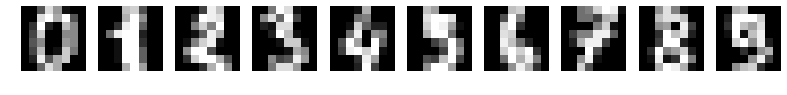

A multi-class classification problem that you solved using softmax and 10 neurons in your output layer.
You will now build a new deeper model consisting of 3 hidden layers of 50 neurons each, using batch normalization in between layers. The kernel_initializer parameter is used to initialize weights in a similar way.



In [ ]:
# Import batch normalization from keras layers
from keras.layers import BatchNormalization

# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### ***Batch normalization effects***
Batch normalization tends to increase the learning speed of our models and make their learning curves more stable. Let's see how two identical models with and without batch normalization compare.

The model you just built batchnorm_model is loaded for you to use. An exact copy of it without batch normalization: standard_model, is available as well. You can check their summary() in the console. X_train, y_train, X_test, and y_test are also loaded so that you can train both models.

You will compare the accuracy learning curves for both models plotting them with compare_histories_acc().

You can check the function pasting show_code(compare_histories_acc) in the console.

In [ ]:
# Train your standard model, storing its history callback
h1_callback = standard_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

# Train the batch normalized model you recently built, store its history callback
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, verbose=0)

# Call compare_histories_acc passing in both model histories
compare_histories_acc(h1_callback, h2_callback)

### ***Preparing a model for tuning***
Let's tune the hyperparameters of a binary classification model that does well classifying the breast cancer dataset.

You've seen that the first step to turn a model into a sklearn estimator is to build a function that creates it. The definition of this function is important since hyperparameter tuning is carried out by varying the arguments your function receives.

Build a simple create_model() function that receives both a learning rate and an activation function as arguments. The Adam optimizer has been imported as an object from keras.optimizers so that you can also change its learning rate parameter.

In [ ]:
# Creates a model given an activation and learning rate
def create_model(learning_rate, activation):
  
  	# Create an Adam optimizer with the given learning rate
  	opt = Adam(lr = learning_rate)
  	
  	# Create your binary classification model  
  	model = Sequential()
  	model.add(Dense(128, input_shape = (30,), activation = activation))
  	model.add(Dense(256, activation = activation))
  	model.add(Dense(1, activation = 'sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer = opt, loss = "cross_entropy", metrics = ['accuracy'])
  	return model

### ***Tuning the model parameters***
It's time to try out different parameters on your model and see how well it performs!

The create_model() function you built in the previous exercise is ready for you to use.

Since fitting the RandomizedSearchCV object would take too long, the results you'd get are printed in the show_results() function. You could try random_search.fit(X,y) in the console yourself to check it does work after you have built everything else, but you will probably timeout the exercise (so copy your code first if you try this or you can lose your progress!).

You don't need to use the optional epochs and batch_size parameters when building your KerasClassifier object since you are passing them as params to the random search and this works already.

In [ ]:
# Import KerasClassifier from keras scikit learn wrappers
from keras.wrappers.scikit_learn import KerasClassifier

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [32,128,256], 
          'epochs': [50, 100, 200], 'learning_rate': [0.1,0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Running random_search.fit(X,y) would start the search,but it takes too long! 
show_results()

### ***Training with cross-validation***
Time to train your model with the best parameters found: 0.001 for the learning rate, 50 epochs, a 128 batch_size and relu activations.

The create_model() function from the previous exercise is ready for you to use. X and y are loaded as features and labels.

Use the best values found for your model when creating your KerasClassifier object so that they are used when performing cross_validation.

End this chapter by training an awesome tuned model on the breast cancer dataset!

In [ ]:
# Import KerasClassifier from keras wrappers
from keras.wrappers.scikit_learn import KerasClassifier

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model(learning_rate = 0.001, activation = 'relu'), epochs = 50, 
                        batch_size = 128, verbose = 0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model, X, y, cv = 3)

# Print the mean accuracy
print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of:', kfolds.std())

### ***It's a flow of tensors***
If you have already built a model, you can use the model.layers and the keras.backend to build functions that, provided with a valid input tensor, return the corresponding output tensor.

This is a useful tool when we want to obtain the output of a network at an intermediate layer.

For instance, if you get the input and output from the first layer of a network, you can build an inp_to_out function that returns the result of carrying out forward propagation through only the first layer for a given input tensor.

So that's what you're going to do right now!

X_test from the Banknote Authentication dataset and its model are preloaded. Type model.summary() in the console to check it.

In [ ]:
# Import keras backend
import keras.backend as K

# Input tensor from the 1st layer of the model
inp = model.layers[0].input

# Output tensor from the 1st layer of the model
out = model.layers[0].output

# Define a function from inputs to outputs
inp_to_out = K.function([inp], [out])

# Print the results of passing X_test through the 1st layer
print(inp_to_out([X_test]))

### ***Neural separation***
Put on your gloves because you're going to perform brain surgery!

Neurons learn by updating their weights to output values that help them better distinguish between the different output classes in your dataset. You will make use of the inp_to_out() function you just built to visualize the output of two neurons in the first layer of the Banknote Authentication model as it learns.

The model you built in chapter 2 is ready for you to use, just like X_test and y_test. Paste show_code(plot) in the console if you want to check plot().

You're performing heavy duty, once all is done, click through the graphs to watch the separation live!

In [ ]:
for i in range(0, 21):
  	# Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size = 16, epochs = 1, verbose = 0)
    if i%4==0: 
      # Get the output of the first layer
      layer_output = inp_to_out([X_test])[0]
      
      # Evaluate model accuracy for this epoch
      test_accuracy = model.evaluate(X_test, y_test)[1] 
      
      # Plot 1st vs 2nd neuron output
      plot(test_accuracy)

### ***Building an autoencoder***
Autoencoders have several interesting applications like anomaly detection or image denoising. They aim at producing an output identical to its inputs. The input will be compressed into a lower dimensional space, encoded. The model then learns to decode it back to its original form.

You will encode and decode the MNIST dataset of handwritten digits, the hidden layer will encode a 32-dimensional representation of the image, which originally consists of 784 pixels (28 x 28). The autoencoder will essentially learn to turn the 784 pixels original image into a compressed 32 pixels image and learn how to use that encoded representation to bring back the original 784 pixels image.

The Sequential model and Dense layers are ready for you to use.

Let's build an autoencoder!

In [ ]:
# Start with a sequential model
autoencoder = Sequential()

# Add a dense layer with input the original image pixels and neurons the encoded representation
autoencoder.add(Dense(32, input_shape=(784, ), activation="relu"))

# Add an output layer with as many neurons as the orginal image pixels
autoencoder.add(Dense(784, activation = "sigmoid"))

# Compile your model with adadelta
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

# Summarize your model structure
autoencoder.summary()

### ***De-noising like an autoencoder***
Okay, you have just built an autoencoder model. Let's see how it handles a more challenging task.

First, you will build a model that encodes images, and you will check how different digits are represented with show_encodings(). To build the encoder you will make use of your autoencoder, that has already being trained. You will just use the first half of the network, which contains the input and the bottleneck output. That way, you will obtain a 32 number output which represents the encoded version of the input image.

Then, you will apply your autoencoder to noisy images from MNIST, it should be able to clean the noisy artifacts.

X_test_noise is loaded in your workspace. The digits in this noisy dataset look like this:


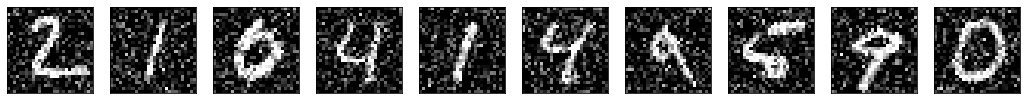

Apply the power of the autoencoder!

In [ ]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict(X_test_noise)
show_encodings(encodings, number = 1)

# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test_noise)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

### ***Building a CNN model***
Building a CNN model in Keras isn't much more difficult than building any of the models you've already built throughout the course! You just need to make use of convolutional layers.

You're going to build a shallow convolutional model that classifies the MNIST digits dataset. The same one you de-noised with your autoencoder! The images are 28 x 28 pixels and just have one channel, since they are black and white pictures.

Go ahead and build this small convolutional model!

In [ ]:
# Import the Conv2D and Flatten layers and instantiate model
from keras.layers import Conv2D,Flatten
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(32, kernel_size = 3, input_shape = (28, 28, 1), activation = 'relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))

# Flatten the previous layer output
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation = 'softmax'))

### ***Looking at convolutions***
Inspecting the activations of a convolutional layer is a cool thing. You have to do it at least once in your lifetime!

To do so, you will build a new model with the Keras Model object, which takes in a list of inputs and a list of outputs. The output you will provide to this new model is the first convolutional layer outputs when given an MNIST digit as input image.

The convolutional model you built in the previous exercise has already been trained for you. It can now correctly classify MNIST handwritten images. You can check it with model.summary() in the console.

Let's look at the convolutional masks that were learned in the first convolutional layer of this model!

In [ ]:
# Obtain a reference to the outputs of the first layer
first_layer_output = model.layers[0].output

# Build a model using the model's input and the first layer output
first_layer_model = Model(inputs = model.layers[0].input, outputs = first_layer_output)

# Use this model to predict on X_test
activations = first_layer_model.predict(X_test)

# Plot the activations of first digit of X_test for the 15th filter
axs[0].matshow(activations[0,:,:,14], cmap = 'viridis')

# Do the same but for the 18th filter now
axs[1].matshow(activations[0,:,:,18], cmap = 'viridis')
plt.show()

### ***Preparing your input image***
The original ResNet50 model was trained with images of size 224 x 224 pixels and a number of preprocessing operations; like the subtraction of the mean pixel value in the training set for all training images. You need to pre-process the images you want to predict on in the same way.

When predicting on a single image you need it to fit the model's input shape, which in this case looks like this: (batch-size, width, height, channels),np.expand_dims with parameter axis = 0 adds the batch-size dimension, representing that a single image will be passed to predict. This batch-size dimension value is 1, since we are only predicting on one image.

You will go over these preprocessing steps as you prepare this dog's (named Ivy) image into one that can be classified by ResNet50.

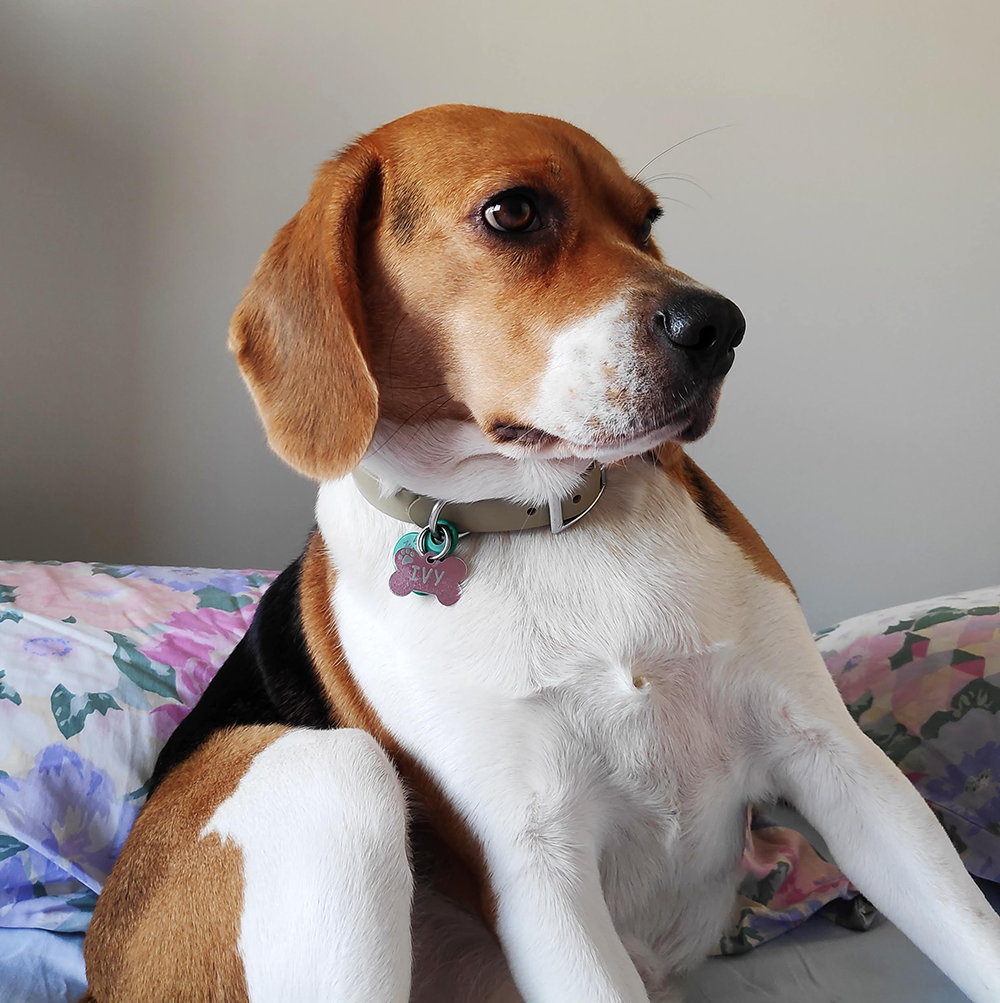

In [ ]:
# Import image and preprocess_input
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

# Load the image with the right target size for your model
img = image.load_img(img_path, target_size=(224, 224))

# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis = 0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)

Using a real world model
Okay, so Ivy's picture is ready to be used by ResNet50. It is stored in img_ready and now looks like this:

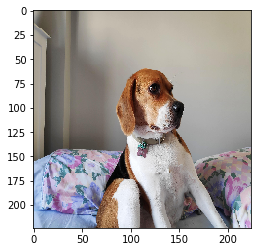


ResNet50 is a model trained on the Imagenet dataset that is able to distinguish between 1000 different labeled objects. ResNet50 is a deep model with 50 layers, you can check it in 3D here.

ResNet50 and decode_predictions have both been imported from keras.applications.resnet50 for you.

It's time to use this trained model to find out Ivy's breed!

In [ ]:
# Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

### ***Text prediction with LSTMs***
During the following exercises you will build a toy LSTM model that is able to predict the next word using a small text dataset. This dataset consist of cleaned quotes from the The Lord of the Ring movies. You can find them in the text variable.

You will turn this text into sequences of length 4 and make use of the Keras Tokenizer to prepare the features and labels for your model!

The Keras Tokenizer is already imported for you to use. It assigns a unique number to each unique word, and stores the mappings in a dictionary. This is important since the model deals with numbers but we later will want to decode the output numbers back into words.

In [ ]:
# Import the Embedding, LSTM and Dense layer
from keras.layers import Embedding, LSTM, Dense

model = Sequential()

# Add an Embedding layer with the right parameters
model.add(Embedding(input_dim = 44, input_length = 3, output_dim = 8, ))

# Add a 32 unit LSTM layer
model.add(LSTM(32))

# Add a hidden Dense layer of 32 units and an output layer of vocab_size with softmax
model.add(Dense(32, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

### ***Build your LSTM model***
You've already prepared your sequences of text. It's time to build your LSTM model!

Remember your sequences had 4 words each, your model will be trained on the first three words of each sequence, predicting the 4th one. You are going to use an Embedding layer that will essentially learn to turn words into vectors. These vectors will then be passed to a simple LSTM layer. Our output is a Dense layer with as many neurons as words in the vocabulary and softmax activation. This is because we want to obtain the highest probable next word out of all possible words.

The size of the vocabulary of words (the unique number of words) is stored in vocab_size.

In [ ]:
# Import the Embedding, LSTM and Dense layer
from keras.layers import Embedding, LSTM, Dense

model = Sequential()

# Add an Embedding layer with the right parameters
model.add(Embedding(input_dim = 44, input_length = 3, output_dim = 8, ))

# Add a 32 unit LSTM layer
model.add(LSTM(32))

# Add a hidden Dense layer of 32 units and an output layer of vocab_size with softmax
model.add(Dense(32, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

### ***Decode your predictions***
Your LSTM model has already been trained (details in the previous exercise success message) so that you don't have to wait. It's time to define a function that decodes its predictions. The trained model will be passed as a default parameter to this function.

Since you are predicting on a model that uses the softmax function, numpy's argmax() can be used to obtain the index/position representing the most probable next word out of the output vector of probabilities.

The tokenizer you previously created and fitted, is loaded for you. You will be making use of its internal index_word dictionary to turn the model's next word prediction (which is an integer) into the actual written word it represents.

You're very close to experimenting with your model!